In [4]:
from diffusers import DiffusionPipeline
import torch
from dataclasses import dataclass
from diffusers.utils import make_image_grid
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
@dataclass
class TrainingConfig:
    eval_batch_size: int = 4
    seed: int = 0
    image_width: int = 192
    image_height: int = 256
    rows: int = 2
    cols: int = eval_batch_size // rows

config = TrainingConfig()



# Unconditioned Model

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

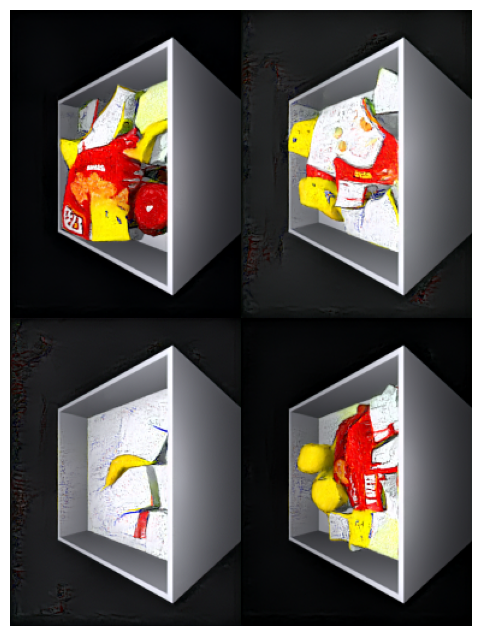

In [6]:
pipeline = DiffusionPipeline.from_pretrained("IsaacAkintaro/unconditioned_v2_retry")
pipeline.to(device="cuda")

# Generate images using the config settings
images = pipeline(
    batch_size=config.eval_batch_size,  # Use the batch size
    generator=torch.manual_seed(config.seed)  # Set the seed for reproducibility
).images


# Create an image grid
image_grid = make_image_grid(images, rows=config.rows, cols=config.cols)
# Save the grid as an image file
image_grid.save("unconditional_image_grid.png")
# Display the grid inline using matplotlib
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.imshow(np.asarray(image_grid))
plt.axis('off')  # Hide the axes
plt.show()

# Conditioned on Depth Model

In [7]:
from depth_val_loader import get_depth_data_loaders

# Set your parameters
mat_files_dir = 'mixed_data_set'
batch_size = config.eval_batch_size

# Use the config's image dimensions
image_width = config.image_width
image_height = config.image_height

# Get the train and validation dataloaders
train_dataloader, val_dataloader = get_depth_data_loaders(mat_files_dir, batch_size, image_width, image_height)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

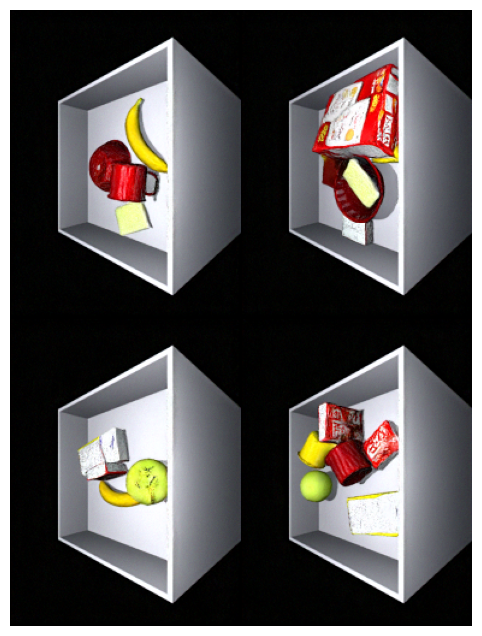

In [8]:
pipeline = DiffusionPipeline.from_pretrained("IsaacAkintaro/bear_depth_v3")
pipeline.to(device="cuda")
images = pipeline(
    batch_size=config.eval_batch_size,  # Use the batch size
    generator=torch.manual_seed(config.seed),  # Set the seed from config for reproducibility
    val_dataloader=val_dataloader # Triggers the case where the model can take 4 inputs and give 3 outputs
).images


# Create an image grid
image_grid = make_image_grid(images, rows=config.rows, cols=config.cols)
# Save the grid as an image file
image_grid.save("depth_conditioned_image_grid.png")
# Display the grid inline using matplotlib
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.imshow(np.asarray(image_grid))
plt.axis('off')  # Hide the axes
plt.show()


# Conditioned on Class Model

In [9]:
from class_val_loader import get_class_data_loaders

# Set your parameters
mat_files_dir = 'mixed_data_set'
batch_size = config.eval_batch_size

# Use the config's image dimensions
image_width = config.image_width
image_height = config.image_height

# Get the train and validation dataloaders
train_dataloader, val_dataloader = get_class_data_loaders(mat_files_dir, batch_size, image_width, image_height)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

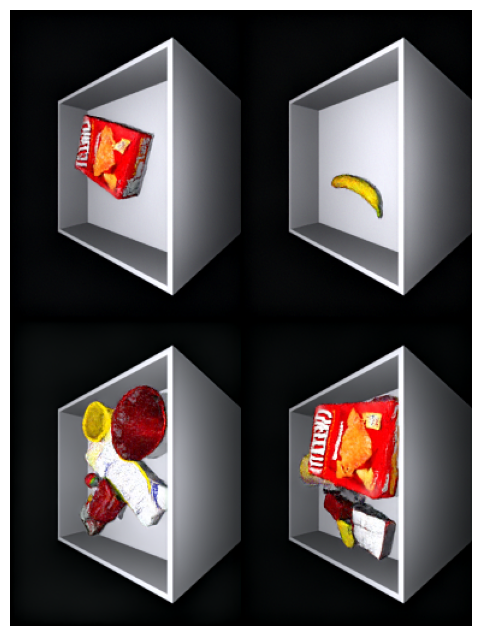

In [10]:
pipeline = DiffusionPipeline.from_pretrained("IsaacAkintaro/bear_class_v1")
pipeline.to(device="cuda")
images = pipeline(
    batch_size=config.eval_batch_size,  # Use the batch size
    generator=torch.manual_seed(config.seed),  # Set the seed for reproducibility
    val_dataloader=val_dataloader
).images


# Create an image grid
image_grid = make_image_grid(images, rows=config.rows, cols=config.cols)
# Save the grid as an image file
image_grid.save("class_conditioned_image_grid.png")
# Display the grid inline using matplotlib
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.imshow(np.asarray(image_grid))
plt.axis('off')  # Hide the axes
plt.show()